### Student Name: Conor Kennedy 
### Student Number: 16722649

---

# Multiprocessing using Pools 
A simple framework for assessing the impact of multiprocessing on runtime on a multi-core machine. 

In [2]:
import time
import math
import multiprocessing
from multiprocessing import Pool
import unittest
import random
import time
import numpy as np
import matplotlib.pyplot as plt

# A function for timing a job that uses a pool of processes.
#  f is a function that takes a single argument
#  data is an array of arguments on which f will be mapped
#  pool_size is the number of processes in the pool. 

def pool_process(f, data, pool_size):
    tp1 = time.time()
    pool = Pool(processes=pool_size) # initialize the Pool.
    result = pool.map(f, data)       # map f to the data using the Pool of processes to do the work 
    pool.close() # No more processes
    pool.join()  # Wait for the pool processing to complete. 
    print("Results", result)
    time_taken = int(time.time()-tp1)
    print("Overall Time:", time_taken)
 

In [112]:
def my_func(x):
    s = math.sqrt(x)
    return s

In [113]:
# This verbose version shows which process in the pool is running each task. 
def my_func_verbose(x):
    s = math.sqrt(x)
    print("Task", multiprocessing.current_process(), x, s)
    return s

In [114]:
dataRange = range(10)

Use the pool_process function to apply my_func to the data in dataRange.  
This task is so light it requires very little processing time. 

In [3]:
import functions as functions

In [116]:
pool_process(functions.my_func, dataRange, 2)

Results [0.0, 1.0, 1.4142135623730951, 1.7320508075688772, 2.0, 2.23606797749979, 2.449489742783178, 2.6457513110645907, 2.8284271247461903, 3.0]
Overall Time: 0


In [117]:
pool_process(functions.my_func_verbose, dataRange, 2)

Results [0.0, 1.0, 1.4142135623730951, 1.7320508075688772, 2.0, 2.23606797749979, 2.449489742783178, 2.6457513110645907, 2.8284271247461903, 3.0]
Overall Time: 0


### Q1 - Connect the check_prime function to the Pool processing function. Generate sets of work (numbers to be checked) to be processed by the pool. Quantify the speedup achieved with multiple cores (at least 2). What lessons can be learned from these results?

## A naive function for checking primes 

In [237]:
def check_prime(num):
    t1 = time.time()
    res = False
    if num > 0:
        # check for factors
        for i in range(2,num):
            if (num % i) == 0:
                print(num,"is not a prime number")
                print(i,"times",num//i,"is",num)
                print("Time:", int(time.time()-t1))
                break
        else:
            print(num,"is a prime number")
            print("Time:", time.time()-t1) 
            res = True
            # if input number is less than
            # or equal to 1, it is not prime
    return res


In [238]:
class Test_Prime_Function(unittest.TestCase):
    
    def test_1(self):
        self.assertTrue(check_prime(2))
        
    def test_2(self):
        self.assertTrue(check_prime(7))
        
    def test_3(self):
        self.assertTrue(check_prime(5))
    
    def test_3(self):
        self.assertTrue(check_prime(1000))
        
        
        
unittest.main(argv=[''], verbosity=2, exit=False)

test_1 (__main__.Test_Factorial_Function) ... ok
test_2 (__main__.Test_Factorial_Function) ... ok
test_3 (__main__.Test_Factorial_Function) ... ok
test_1 (__main__.Test_Prime_Function) ... ok
test_2 (__main__.Test_Prime_Function) ... ok
test_3 (__main__.Test_Prime_Function) ... 

2 is a prime number
Time: 0.00027108192443847656
7 is a prime number
Time: 0.00011491775512695312
1000 is not a prime number
2 times 500 is 1000
Time: 0


FAIL

FAIL: test_3 (__main__.Test_Prime_Function)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<ipython-input-238-046ae6dd7891>", line 13, in test_3
    self.assertTrue(check_prime(1000))
AssertionError: False is not true

----------------------------------------------------------------------
Ran 6 tests in 0.017s

FAILED (failures=1)


In [120]:
check_prime(15488801)

15488801 is a prime number
Time: 6.656241178512573


True

In [121]:
check_prime(15488803)

15488803 is not a prime number
11 times 1408073 is 15488803
Time: 0


False

In [122]:
textfile = open("primes2.txt", 'r')
numbers = []
for line in textfile:
    line = line.split()
    for number in line:
        numbers.append(int(number)) 

In [123]:
len(numbers)

1000000

In [124]:
random.randint(0, 999999)

434079

In [125]:
number_list = []

for i in range(10):
    random_index = random.randint(0, 999999)
    add_number = numbers[random_index]
    number_list.append(add_number)
    

In [126]:
len(number_list)

10

In [127]:
random.shuffle(number_list)

In [128]:
len(number_list)

10

In [129]:
print(number_list)

[23785109, 30600679, 22120913, 20535187, 23904973, 32135767, 28653923, 20510521, 18550793, 31695959]


In [130]:
pool_process(functions.check_prime, number_list, 2)

Results [True, True, True, True, True, True, True, True, True, True]
Overall Time: 70


In [132]:
number_of_cores = multiprocessing.cpu_count()

In [133]:
print(number_of_cores)

4


In [134]:
cores = []
times_list = []

for i in range(1, (number_of_cores + 1)):
    
    if i == 1 :
        print("Running on", i, "processor:")
        cores.append(i)
        tp2 = time.time()
        pool_process(functions.check_prime, number_list, i)
        time_taken = int(time.time()-tp2)
        print(time_taken)
        times_list.append(time_taken)
        print("sleeping...")
        counter = 5
        while counter >= 0 :
            time.sleep(1)
            print(counter)
            counter -= 1
            
    else :
        print()
        print("Running on", i, "processors:")
        cores.append(i)
        tp2 = time.time()
        pool_process(functions.check_prime, number_list, i)
        time_taken = int(time.time()-tp2)
        print(time_taken)
        times_list.append(time_taken)
        print("sleeping...")
        counter = 5
        while counter >= 0 :
            time.sleep(1)
            print(counter)
            counter -= 1


Running on 1 processor:
Results [True, True, True, True, True, True, True, True, True, True]
Overall Time: 114
114
sleeping...
5
4
3
2
1
0

Running on 2 processors:
Results [True, True, True, True, True, True, True, True, True, True]
Overall Time: 74
74
sleeping...
5
4
3
2
1
0

Running on 3 processors:
Results [True, True, True, True, True, True, True, True, True, True]
Overall Time: 50
50
sleeping...
5
4
3
2
1
0

Running on 4 processors:
Results [True, True, True, True, True, True, True, True, True, True]
Overall Time: 45
45
sleeping...
5
4
3
2
1
0


In [135]:
print(cores)
print(times_list)

[1, 2, 3, 4]
[114, 74, 50, 45]


([<matplotlib.axis.XTick at 0x7fd712baaee0>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

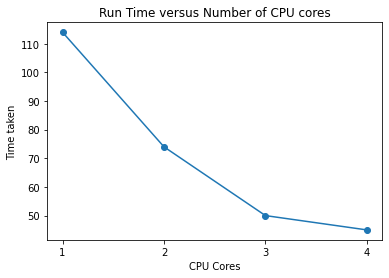

In [220]:
plt.xlabel('CPU Cores')
plt.ylabel('Time taken')
plt.title('Run Time versus Number of CPU cores')
plt.plot(cores, times_list, '-o')
plt.xticks(cores)

In [148]:
print(times_list)
print(cores)

[114, 74, 50, 45]
[1, 2, 3, 4]


In [167]:
print(times_list)

[114, 74, 50, 45]


In [176]:
for i in cores :
    if i == 1 :
        continue
    elif i > 1 :
        print(round(100*(times_list[i - 1]/ times_list[0]), 2))

64.91
43.86
39.47


In [189]:
#comparing processing time with the time of the initial 1 processor:

for i in cores :
    if i == 1 :
        continue
    else :
        print("The percentage increase in speed with", i,  "CPU cores compared to 1 CPU core is", str(round(100*(times_list[i - 1]/ times_list[0]), 2)))
              

The percentage increase in speed with 2 processors compared to 1 processor is 64.91
The percentage increase in speed with 3 processors compared to 1 processor is 43.86
The percentage increase in speed with 4 processors compared to 1 processor is 39.47


In [200]:
#comparing processing time with the time of the previous amount of processors:

for i in cores :
    if i == 1 :
        continue
    else :
        x = i - 1
        print("The difference in speed as a percent with", i,  "CPU cores compared to", x, "CPU cores is minus", str(round(100 - (100*(times_list[i - 1] / times_list[i - 2])), 2)), "%")

        #print("The percentage increase in speed with", i,  "processors compared to 1 processor is", str(round(100*(times_list[i - 1]/ times_list[0]), 2)))



The difference in speed as a percent with 2 processors compared to 1 processor is minus 35.09 %
The difference in speed as a percent with 3 processors compared to 2 processor is minus 32.43 %
The difference in speed as a percent with 4 processors compared to 3 processor is minus 10.0 %


In [138]:
number_list_shortened = number_list[:5]

In [139]:
print(number_list_shortened)

[23785109, 30600679, 22120913, 20535187, 23904973]


In [140]:
time_taken = []
time_taken_p1 = []
time_taken_p2 = []
time_taken_p3 = []
time_taken_p4 = []
    
for x in range(1, 5): 
    
    if x == 1:
        print("Running on", x, "processor")
    else :
        print()
        print("Running on", x, "processors")
    
    subsequence_list = []
    
    new_list = []
        
    for i in number_list_shortened:
            
        subsequence_list.append(i)
        
        sum_time = 0
        
        start_time = time.time()
        
        pool_process(functions.check_prime, subsequence_list, x)   
        
        stop_time = time.time()
        
        elapsed_time = stop_time - start_time
        
        if x == 1:
            time_taken_p1.append(elapsed_time)
        elif x == 2 :
            time_taken_p2.append(elapsed_time)
        elif x == 3 :
            time_taken_p3.append(elapsed_time)
        else :
            time_taken_p4.append(elapsed_time)
            
        new_list.append(elapsed_time)
        
    time_taken.append(new_list)

Running on 1 processor
Results [True]
Overall Time: 11
Results [True, True]
Overall Time: 25
Results [True, True, True]
Overall Time: 35
Results [True, True, True, True]
Overall Time: 49
Results [True, True, True, True, True]
Overall Time: 53

Running on 2 processors
Results [True]
Overall Time: 10
Results [True, True]
Overall Time: 14
Results [True, True, True]
Overall Time: 20
Results [True, True, True, True]
Overall Time: 24
Results [True, True, True, True, True]
Overall Time: 33

Running on 3 processors
Results [True]
Overall Time: 10
Results [True, True]
Overall Time: 15
Results [True, True, True]
Overall Time: 15
Results [True, True, True, True]
Overall Time: 20
Results [True, True, True, True, True]
Overall Time: 24

Running on 4 processors
Results [True]
Overall Time: 10
Results [True, True]
Overall Time: 14
Results [True, True, True]
Overall Time: 15
Results [True, True, True, True]
Overall Time: 17
Results [True, True, True, True, True]
Overall Time: 22


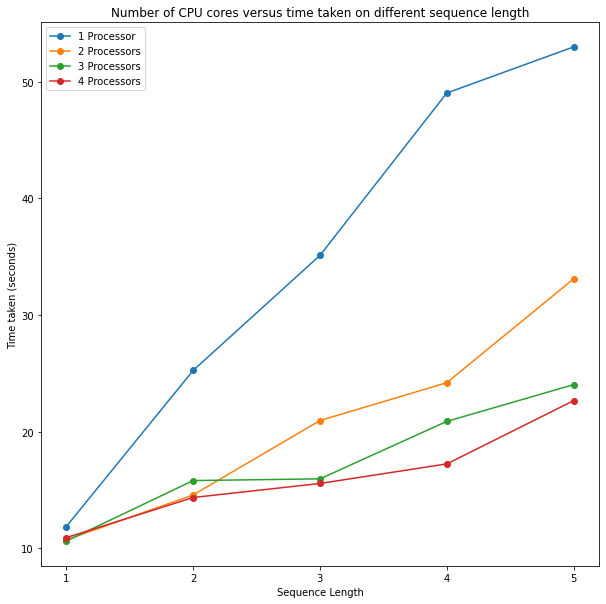

In [225]:
sequence_length = [1, 2, 3, 4 , 5]
plt.figure(figsize=(10,10))
plt.xlabel('Sequence Length')
plt.ylabel('Time taken (seconds)')
plt.title('Number of CPU cores versus time taken on different sequence length')
plt.plot(sequence_length, time_taken_p1, '-o', label='1 Processor')
plt.plot(sequence_length, time_taken_p2, '-o', label='2 Processors')
plt.plot(sequence_length, time_taken_p3, '-o', label='3 Processors')
plt.plot(sequence_length, time_taken_p4, '-o', label='4 Processors')
plt.xticks(sequence_length)

plt.legend()

In [142]:
print(time_taken)

[[11.850394010543823, 25.242077827453613, 35.113585233688354, 49.049440145492554, 53.00676989555359], [10.706568241119385, 14.557746887207031, 20.94239330291748, 24.190733194351196, 33.099587202072144], [10.599528074264526, 15.7935631275177, 15.93989896774292, 20.87094497680664, 24.02284002304077], [10.896455764770508, 14.339903116226196, 15.544494867324829, 17.2226459980011, 22.64823007583618]]


In [201]:
for time in time_taken:
    print(time)

[11.850394010543823, 25.242077827453613, 35.113585233688354, 49.049440145492554, 53.00676989555359]
[10.706568241119385, 14.557746887207031, 20.94239330291748, 24.190733194351196, 33.099587202072144]
[10.599528074264526, 15.7935631275177, 15.93989896774292, 20.87094497680664, 24.02284002304077]
[10.896455764770508, 14.339903116226196, 15.544494867324829, 17.2226459980011, 22.64823007583618]


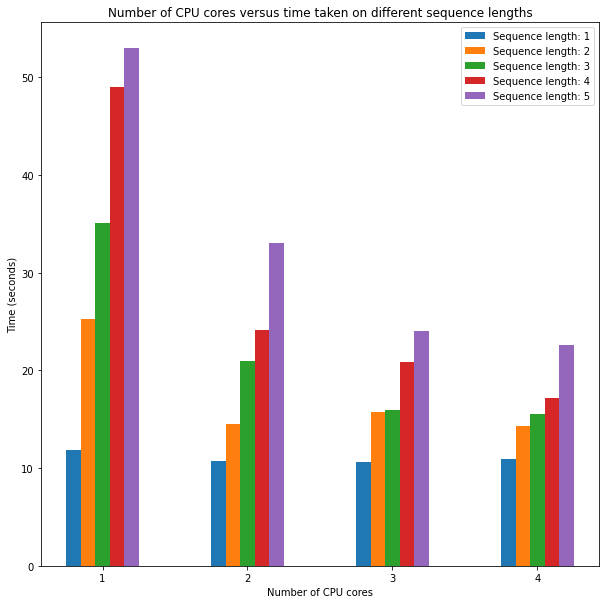

In [222]:
#adapted from - https://www.geeksforgeeks.org/create-a-grouped-bar-plot-in-matplotlib/

list_one = [time[0] for time in time_taken]
list_two = [time[1] for time in time_taken]
list_three = [time[2] for time in time_taken]
list_four = [time[3] for time in time_taken]
list_five = [time[4] for time in time_taken]

x = np.arange(1, 5)
width = 0.1

plt.figure(figsize=(10, 10))
plt.bar(x-0.2, list_one, width)
plt.bar(x-0.1, list_two, width)
plt.bar(x, list_three, width)
plt.bar(x+0.1, list_four, width)
plt.bar(x+0.2, list_five, width)

plt.title("Number of CPU cores versus time taken on different sequence lengths")
plt.xlabel("Number of CPU cores")
plt.ylabel("Time (seconds)")
plt.legend(["Sequence length: " + str(i) for i in range(1, 6)])
plt.xticks(cores)
plt.show()

### Q2 - Identify an alternative processing task that will also test the CPU and repeat the assessment. What lessons can be learned from these results?

#### The alternative processing task that has been chosen is the <code>factorial_iterative</code> function below.

In [239]:
def factorial_iterative(n) :
    if n == 1 or n == 0:
        return 1
    else :
        fact = n
    
        while n > 1 :
            n = n - 1
            fact = fact * n
        return fact

In [240]:
class Test_Factorial_Function(unittest.TestCase):
    
    def test_1(self):
        self.assertTrue(factorial_iterative(2), 4)
        
    def test_2(self):
        self.assertTrue(factorial_iterative(3), 6)
        
    def test_3(self):
        self.assertTrue(factorial_iterative(4), 24)
        
unittest.main(argv=[''], verbosity=2, exit=False)

test_1 (__main__.Test_Factorial_Function) ... ok
test_2 (__main__.Test_Factorial_Function) ... ok
test_3 (__main__.Test_Factorial_Function) ... ok
test_1 (__main__.Test_Prime_Function) ... ok
test_2 (__main__.Test_Prime_Function) ... ok
test_3 (__main__.Test_Prime_Function) ... 

2 is a prime number
Time: 0.00032210350036621094
7 is a prime number
Time: 0.00027871131896972656
1000 is not a prime number
2 times 500 is 1000
Time: 0


FAIL

FAIL: test_3 (__main__.Test_Prime_Function)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<ipython-input-238-046ae6dd7891>", line 13, in test_3
    self.assertTrue(check_prime(1000))
AssertionError: False is not true

----------------------------------------------------------------------
Ran 6 tests in 0.011s

FAILED (failures=1)


In [241]:
start_time = time.time()
factorial_iterative(5)
elapsed_time = time.time() - start_time
print("Time taken:", elapsed_time)

Time taken: 0.0002129077911376953


In [243]:
start_time = time.time()
factorial_iterative(100000)
elapsed_time = time.time() - start_time
print("Time taken:", elapsed_time)

Time taken: 16.87700605392456


In [283]:
data = []

In [284]:
for i in range(5):
    random_number = random.randint(10000, 99999)
    data.append(random_number)

In [285]:
print(data)

[78265, 55583, 46591, 95425, 90602]


In [286]:
number_of_cores = multiprocessing.cpu_count()

In [287]:
def pool_process(f, data, pool_size):
    tp1 = time.time()
    pool = Pool(processes=pool_size) # initialize the Pool.
    result = pool.map(f, data)       # map f to the data using the Pool of processes to do the work 
    pool.close() # No more processes
    pool.join()  # Wait for the pool processing to complete. 
    #print("Results", result)
    time_taken = int(time.time()-tp1)
    print("Overall Time:", time_taken)
    return time_taken
        

In [288]:
cores = []
times_list = []

for i in range(1, (number_of_cores + 1)):
    print("Running on", i, "processors: ")
    cores.append(i)
    tp2 = time.time()
    pool_process(functions.factorial_iterative, data, i)
    time_taken_ = int(time.time()-tp2)
    print(time_taken_)
    times_list.append(time_taken_)
    print("sleeping...")
    counter = 5
    while counter >= 0 :
        time.sleep(1)
        print(counter)
        counter -= 1

Running on 1 processors: 
Overall Time: 44
44
sleeping...
5
4
3
2
1
0
Running on 2 processors: 
Overall Time: 25
25
sleeping...
5
4
3
2
1
0
Running on 3 processors: 
Overall Time: 20
20
sleeping...
5
4
3
2
1
0
Running on 4 processors: 
Overall Time: 19
19
sleeping...
5
4
3
2
1
0


In [289]:
print(times_list)

[44, 25, 20, 19]


([<matplotlib.axis.XTick at 0x7fd71429c7c0>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

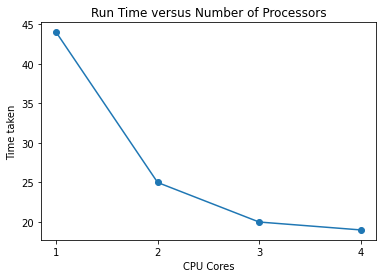

In [290]:
plt.xlabel('CPU Cores')
plt.ylabel('Time taken')
plt.title('Run Time versus Number of Processors')
plt.plot(cores, times_list,  '-o',)
plt.xticks(cores)

### Looking at the impact of sequence length:

In [272]:
data = []

In [273]:
for i in range(5):
    random_number = random.randint(50000, 99999)
    data.append(random_number)

In [274]:
print(data)

[90891, 81164, 80501, 76044, 99203]


In [275]:
time_taken = []
time_taken_p1 = []
time_taken_p2 = []
time_taken_p3 = []
time_taken_p4 = []
    
for x in range(1, 5): 
    
    if x == 1:
        print("Running on", x, "processor")
    else :
        print()
        print("Running on", x, "processors")
    
    subsequence_list = []
    
    new_list = []
        
    for i in data:
            
        subsequence_list.append(i)
        
        sum_time = 0
        
        start_time = time.time()
        
        pool_process(functions.factorial_iterative, subsequence_list, x)   
        
        stop_time = time.time()
        
        elapsed_time = stop_time - start_time
        
        if x == 1:
            time_taken_p1.append(elapsed_time)
        elif x == 2 :
            time_taken_p2.append(elapsed_time)
        elif x == 3 :
            time_taken_p3.append(elapsed_time)
        else :
            time_taken_p4.append(elapsed_time)
            
        new_list.append(elapsed_time)
        
    time_taken.append(new_list)

Running on 1 processor
Overall Time: 15
Overall Time: 23
Overall Time: 33
Overall Time: 45
Overall Time: 57

Running on 2 processors
Overall Time: 13
Overall Time: 14
Overall Time: 22
Overall Time: 26
Overall Time: 37

Running on 3 processors
Overall Time: 13
Overall Time: 14
Overall Time: 15
Overall Time: 21
Overall Time: 29

Running on 4 processors
Overall Time: 13
Overall Time: 14
Overall Time: 15
Overall Time: 16
Overall Time: 27


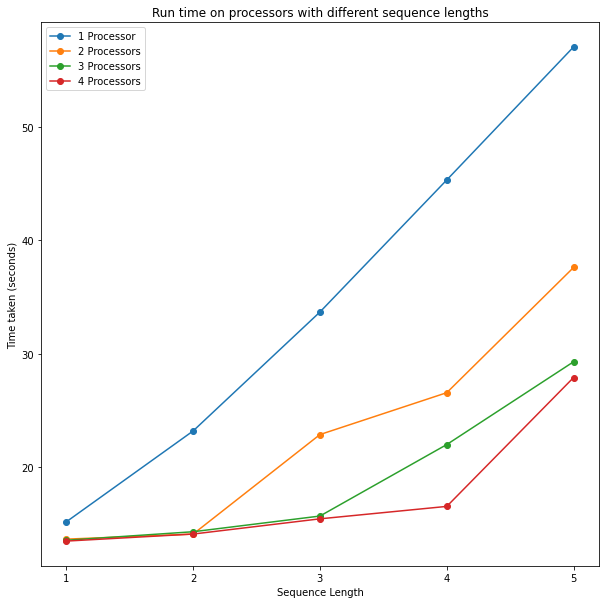

In [281]:
sequence_length = [1, 2, 3, 4 , 5]
plt.figure(figsize=(10,10))
plt.xlabel('Sequence Length')
plt.ylabel('Time taken (seconds)')
plt.title('Run time on processors with different sequence lengths')
plt.plot(sequence_length, time_taken_p1,  '-o', label='1 Processor')
plt.plot(sequence_length, time_taken_p2, '-o', label='2 Processors')
plt.plot(sequence_length, time_taken_p3, '-o', label='3 Processors')
plt.plot(sequence_length, time_taken_p4, '-o', label='4 Processors')
plt.xticks(sequence_length)

plt.legend()

In [5]:
cores = [1, 2, 3, 4]

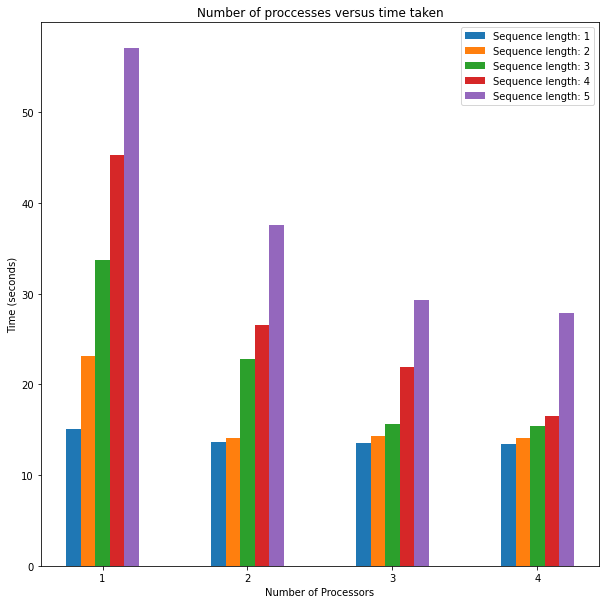

In [9]:
#adapted from - https://www.geeksforgeeks.org/create-a-grouped-bar-plot-in-matplotlib/

list_1 = [time[0] for time in time_taken]
list_2 = [time[1] for time in time_taken]
list_3 = [time[2] for time in time_taken]
list_4 = [time[3] for time in time_taken]
list_5 = [time[4] for time in time_taken]

x = np.arange(1, 5)  
width = 0.1


plt.figure(figsize=(10, 10))
plt.bar(x-0.2, list_1, width)
plt.bar(x-0.1, list_2, width)
plt.bar(x, list_3, width)
plt.bar(x+0.1, list_4, width)
plt.bar(x+0.2, list_5, width)

plt.title("Number of proccesses versus time taken")
plt.xlabel("Number of Processors")
plt.ylabel("Time (seconds)")
plt.legend(["Sequence length: " + str(i) for i in range(1, 6)])
plt.xticks(cores)
plt.show()

In [291]:
print(time_taken)

[[15.140076160430908, 23.167848110198975, 33.67466068267822, 45.3405659198761, 57.092910051345825], [13.610646963119507, 14.056427001953125, 22.8489248752594, 26.547772884368896, 37.610493898391724], [13.511277675628662, 14.264868974685669, 15.65021800994873, 21.96648383140564, 29.2793869972229], [13.437901973724365, 14.060794115066528, 15.404097080230713, 16.50256109237671, 27.88745403289795]]
